--- 
**Author** : Huzaifa Ali

**Email** : *huzaifaa0303@gmail.com*

---

In [ ]:
# pip install -r requirements.txt

In [ ]:
def linebreak():
    print('-' * 50)

1. Create a DataFrame from a dictionary.

In [ ]:
import pandas as pd

data = pd.DataFrame({
    'Name' : ['Huzaifa', 'Amina', 'Ali', 'Izza', 'Fizza'],
    'Age' : [23,25,26,27,None],
    'Subject' : ['Computer', 'Arts', 'Physics', 'Maths', 'Chemistry'],
    'Marks' : [90, 70, 60, 50, None] 
})

---

 2. Read a CSV into a DataFrame.


In [ ]:
# Creating a csv in order to read it later
# Create CSV
data.to_csv('sample_data.csv', index=False)

# Explanation: 
# Index is set to false because not wanted to add index numbers to csv file, it already contain those by default 

# Read CSV
data = pd.read_csv('sample_data.csv')

--- 

3. Display first 5 rows.

In [ ]:
print(data.head())

      Name   Age    Subject  Marks
0  Huzaifa  23.0   Computer   90.0
1    Amina  25.0       Arts   70.0
2      Ali  26.0    Physics   60.0
3     Izza  27.0      Maths   50.0
4    Fizza   NaN  Chemistry    NaN


---

4. Fill missing values with column mean.

In [ ]:
# First check if there is any missing value
data.isnull().sum()

Name       0
Age        1
Subject    0
Marks      1
dtype: int64

In [ ]:
# Fill missing values of column which contains numeric data with their mean 
cleaned_data = data.fillna(
    {
        'Age' : int(data['Age'].mean()),
        'Marks' : int(data['Marks'].mean())
     },
    inplace=False
)

print(cleaned_data)

      Name   Age    Subject  Marks
0  Huzaifa  23.0   Computer   90.0
1    Amina  25.0       Arts   70.0
2      Ali  26.0    Physics   60.0
3     Izza  27.0      Maths   50.0
4    Fizza  25.0  Chemistry   67.0


--- 

5. Sort DataFrame by a column.


In [ ]:
sorted_data = cleaned_data.sort_values('Name')

print(sorted_data)

      Name   Age    Subject  Marks
2      Ali  26.0    Physics   60.0
1    Amina  25.0       Arts   70.0
4    Fizza  25.0  Chemistry   67.0
0  Huzaifa  23.0   Computer   90.0
3     Izza  27.0      Maths   50.0


---

 6. Filter rows (marks > 80).


In [ ]:
filtered_data = sorted_data.query('Marks > 80')
print(filtered_data)

      Name   Age   Subject  Marks
0  Huzaifa  23.0  Computer   90.0


---

 7. Add pass/fail column.

In [ ]:
cleaned_data.loc[cleaned_data['Marks'] > 50, 'Result'] = 'Pass'
cleaned_data.loc[cleaned_data['Marks'] <= 50, 'Result'] = 'Fail'

print(f'New Data : \n{cleaned_data}')

New Data : 
      Name   Age    Subject  Marks Result
0  Huzaifa  23.0   Computer   90.0   Pass
1    Amina  25.0       Arts   70.0   Pass
2      Ali  26.0    Physics   60.0   Pass
3     Izza  27.0      Maths   50.0   Fail
4    Fizza  25.0  Chemistry   67.0   Pass


---

 8. Group by column and compute mean.

In [ ]:
numeric_data = cleaned_data.select_dtypes(include='number')
mean_of_numeric_data = numeric_data.groupby('Age')['Marks'].mean()

print(f'Mean of Data Value : \n{mean_of_numeric_data}')

Mean of Data Value : 
Age
23.0    90.0
25.0    68.5
26.0    60.0
27.0    50.0
Name: Marks, dtype: float64


---

 9. Merge two DataFrames.

In [ ]:
# Create first dataset
df1 = pd.DataFrame({
    'Name': ['Huzaifa', 'Amina', 'Ali'],
    'Score': [88, 92, 20]
})

# Create second dataset
df2 = pd.DataFrame({
    'Name': ['Ali', 'Izza', 'Fizza'],
    'Grade': ['B', 'A', 'B+']
})

print("First dataset:\n", df1)
print("\nSecond dataset:\n", df2)

First dataset:
       Name  Score
0  Huzaifa     88
1    Amina     92
2      Ali     20

Second dataset:
     Name Grade
0    Ali     B
1   Izza     A
2  Fizza    B+


In [ ]:
# by default merge
new_df = df1.merge(df2)
print(new_df)

  Name  Score Grade
0  Ali     20     B


In [ ]:
# to get all rows of data
new_df_all_rows = pd.merge(df1, df2, how='outer')
print(new_df_all_rows)

      Name  Score Grade
0      Ali   20.0     B
1    Amina   92.0   NaN
2    Fizza    NaN    B+
3  Huzaifa   88.0   NaN
4     Izza    NaN     A


---

 10. Drop a column.


In [ ]:
# see all cols
print(new_df_all_rows.columns)

updated_df = new_df_all_rows.drop(columns=['Grade'], inplace=False)

print(updated_df)

Index(['Name', 'Score', 'Grade'], dtype='object')
      Name  Score
0      Ali   20.0
1    Amina   92.0
2    Fizza    NaN
3  Huzaifa   88.0
4     Izza    NaN


---

 11. Replace values <50 with 0.


In [ ]:
updated_df.loc[updated_df['Score'] < 50, 'Score'] = 0

print(updated_df)

      Name  Score
0      Ali    0.0
1    Amina   92.0
2    Fizza    NaN
3  Huzaifa   88.0
4     Izza    NaN


---

 12. Sum a column.

In [ ]:
# Sum of all scores
print(updated_df['Score'].sum())

180.0


---

 13. Create a Series from a list.

In [ ]:
temp_list = [12,34,12,5,23,5,12,6,32]

print(f'List : \n{temp_list}')

# linebreak
print('-'*50)

# make series 
series_data = pd.Series(temp_list)

print(f'Series \n {series_data}')

List : 
[12, 34, 12, 5, 23, 5, 12, 6, 32]
--------------------------------------------------
Series 
 0    12
1    34
2    12
3     5
4    23
5     5
6    12
7     6
8    32
dtype: int64


---

 14. Convert DataFrame column to Series.


In [ ]:
# see data frame
print(updated_df)

# Create series data
series_data = pd.Series(updated_df['Score'])

print(f'\n\n{series_data}')

      Name  Score
0      Ali    0.0
1    Amina   92.0
2    Fizza    NaN
3  Huzaifa   88.0
4     Izza    NaN


0     0.0
1    92.0
2     NaN
3    88.0
4     NaN
Name: Score, dtype: float64


---

 15. Save DataFrame to CSV.


In [ ]:
updated_df.to_csv('updated_data.csv')
print('DataFrame successfully saved to updated_data.csv')

DataFrame successfully saved to updated_data.csv


---

 16. Find unique values in a column.


In [ ]:
# see data 
print(cleaned_data)

print('-' * 50)

print(f'Unique Values : \n\n{cleaned_data["Result"].unique()}')

      Name   Age    Subject  Marks Result
0  Huzaifa  23.0   Computer   90.0   Pass
1    Amina  25.0       Arts   70.0   Pass
2      Ali  26.0    Physics   60.0   Pass
3     Izza  27.0      Maths   50.0   Fail
4    Fizza  25.0  Chemistry   67.0   Pass
--------------------------------------------------
Unique Values : 

['Pass' 'Fail']


--- 

 17. Count non-null values.


In [ ]:
# see data 
print(updated_df)

linebreak()

# Count specific col
print(updated_df['Score'].value_counts(dropna=True))

linebreak()

# Count all cols
print(updated_df.value_counts(dropna=True))


      Name  Score
0      Ali    0.0
1    Amina   92.0
2    Fizza    NaN
3  Huzaifa   88.0
4     Izza    NaN
--------------------------------------------------
Score
0.0     1
92.0    1
88.0    1
Name: count, dtype: int64
--------------------------------------------------
Name     Score
Ali      0.0      1
Amina    92.0     1
Huzaifa  88.0     1
Name: count, dtype: int64


---

 18. Create a pivot table.


In [ ]:
# create data 

data = {
    "Product": ["A", "A", "B", "B", "C", "C"],
    "Month": ["Jan", "Feb", "Jan", "Feb", "Jan", "Feb"],
    "Sales": [100, 150, 200, None, 300, 350]
}

# create dataframe
sales_data = pd.DataFrame(data)

# create pivot table
summary_table = pd.pivot_table(sales_data, 
                                index='Product',
                                columns='Month',
                                values='Sales',
                                aggfunc='sum',
                                fill_value=0)

# print pivot table
print("Pivot Table:\n", summary_table.sort_index(axis=1, ascending=True))


Pivot Table:
 Month      Feb    Jan
Product              
A        150.0  100.0
B          0.0  200.0
C        350.0  300.0


---

 19. Rename columns.


In [ ]:
# check data 
print(updated_df.head())

# Rename score to scores 
updated_df.rename(columns={'Score': 'Scores'}, inplace=True)

linebreak()
print(updated_df)

      Name  Score
0      Ali    0.0
1    Amina   92.0
2    Fizza    NaN
3  Huzaifa   88.0
4     Izza    NaN
--------------------------------------------------
      Name  Scores
0      Ali     0.0
1    Amina    92.0
2    Fizza     NaN
3  Huzaifa    88.0
4     Izza     NaN


---

 20. Check for missing values.


In [ ]:
# sum of missing values in dataframe
updated_df.isnull().sum()


Name      0
Scores    2
dtype: int64

---

 21. Compute column median.


In [ ]:
updated_df['Scores'].median()

np.float64(88.0)

--- 

 22. Double values in a column.

In [ ]:
# check data
print(updated_df)

updated_df['Scores'] = updated_df['Scores'] * 2

linebreak()


print(updated_df)

      Name  Scores
0      Ali     0.0
1    Amina    92.0
2    Fizza     NaN
3  Huzaifa    88.0
4     Izza     NaN
--------------------------------------------------
      Name  Scores
0      Ali     0.0
1    Amina   184.0
2    Fizza     NaN
3  Huzaifa   176.0
4     Izza     NaN


---

 23. Create a bar plot.


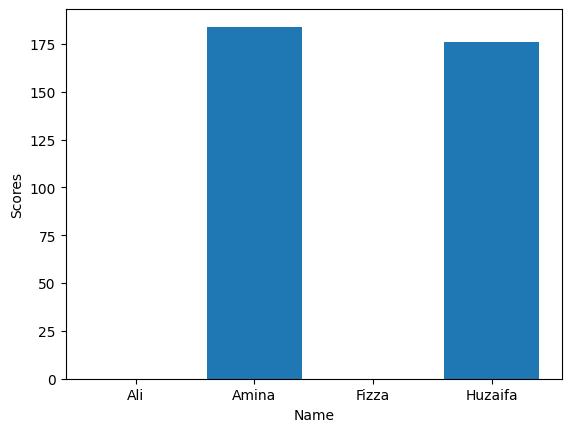

In [ ]:
import matplotlib.pyplot as plt

# create bar plot
plt.bar(updated_df['Name'], updated_df['Scores'])
plt.xlabel('Name')
plt.ylabel('Scores')
plt.show()

---

24. Subplot with bar and line charts.

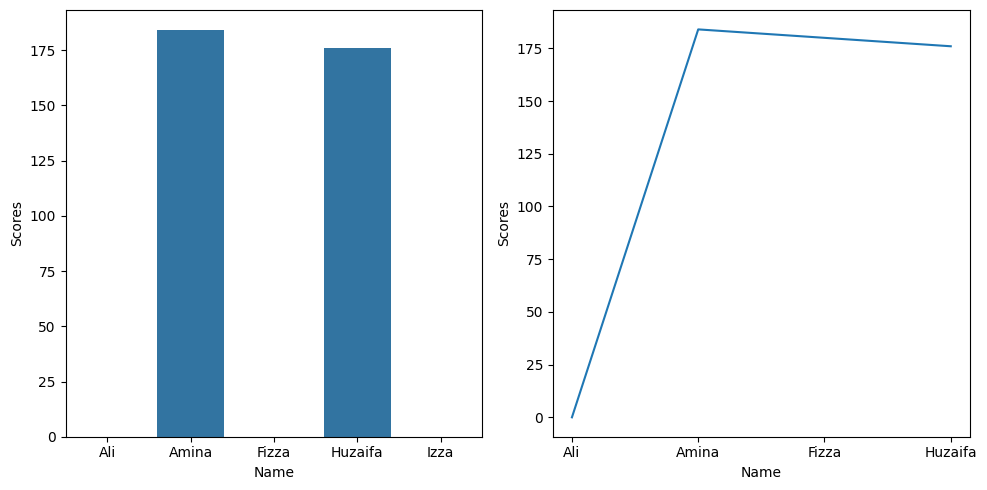

In [ ]:
import seaborn as sns
fig, axs = plt.subplots(1,2, figsize=(10,5))

sns.barplot(x=updated_df['Name'],y=updated_df['Scores'], ax=axs[0])
sns.lineplot(x=updated_df['Name'],y=updated_df['Scores'], ax=axs[1])

plt.tight_layout()
plt.show()